# Content Based Movie Recommender System

In [381]:
import pandas as pd
import numpy as np

In [382]:
#import the movies data
m_data = pd.read_csv("IMDB_movies.csv")
m_data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0458349,Final Contract: Death on Delivery,Final Contract: Death on Delivery,2006,10/11/2008,Action,97,Germany,English,Axel Sand,...,"Drew Fuller, Alison King, Ken Bones, Tanja Wen...","David Glover is a young, American man who is w...",5.2,766,NaN,NaN,"$1,249,280",NaN,9.0,2.0
1,tt4711952,Heil,Heil,2015,7/16/2015,Comedy,102,Germany,German,Dietrich BrÃ¼ggemann,...,"Benno FÃ¼rmann, Jerry Hoffmann, Liv Lisa Fries...",An African-German Author loses his memory and ...,5.4,703,NaN,NaN,"$173,647",NaN,3.0,25.0
2,tt0047937,Chiyari Fuji,Chiyari Fuji,1955,2/27/1955,"Adventure, Drama",94,Japan,Japanese,Tomu Uchida,...,"ChiezÃ´ Kataoka, RyÃ»nosuke Tsukigata, Chizuru...",A samurai travels to Edo with his two servants...,7.4,573,NaN,NaN,NaN,NaN,4.0,22.0
3,tt0030026,Crime School,Crime School,1938,5/28/1938,"Crime, Drama",85,USA,English,"Lewis Seiler, William Clemens",...,"Humphrey Bogart, The Dead End Kids, Gale Page,...",A gang of underprivileged teenagers are senten...,6.6,975,NaN,NaN,NaN,NaN,27.0,7.0
4,tt0071305,Le chaud lapin,Le chaud lapin,1974,10/30/1974,Comedy,120,France,French,Pascal Thomas,...,"Bernard Menez, Daniel Ceccaldi, Claude Barrois...",NaN,5.7,126,NaN,NaN,NaN,NaN,1.0,1.0


In [383]:
m_data.shape # Number of rows & columns

(59164, 22)

In [384]:
m_data.describe() #Statistical summary of the data 

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,59164.000000,59164.000000,59164.000000,5.916400e+04,9264.000000,54033.000000,51150.000000
mean,1992.899567,100.567575,5.931198,9.316266e+03,55.810557,43.163567,27.892747
std,24.028027,26.494961,1.240787,5.217047e+04,17.743438,157.113555,58.679236
min,1906.000000,40.000000,1.000000,1.000000e+02,1.000000,1.000000,1.000000
25%,1978.000000,88.000000,5.300000,2.060000e+02,44.000000,4.000000,3.000000
50%,2002.000000,96.000000,6.100000,4.960000e+02,56.000000,9.000000,8.000000
75%,2012.000000,108.000000,6.800000,1.863250e+03,69.000000,26.000000,24.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,883.000000


In [385]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59164 entries, 0 to 59163
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          59164 non-null  object 
 1   title                  59164 non-null  object 
 2   original_title         59164 non-null  object 
 3   year                   59164 non-null  int64  
 4   date_published         59164 non-null  object 
 5   genre                  59164 non-null  object 
 6   duration               59164 non-null  int64  
 7   country                59135 non-null  object 
 8   language               58610 non-null  object 
 9   director               59106 non-null  object 
 10  writer                 58080 non-null  object 
 11  production_company     56007 non-null  object 
 12  actors                 59122 non-null  object 
 13  description            57396 non-null  object 
 14  avg_vote               59164 non-null  float64
 15  vo

__From above we can observe that there are some missing values in few of the features__

## IMBD Ratings Data Set

In [386]:
#import the ratings data
r_data = pd.read_csv("IMDB_ratings.csv")
r_data.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0458349,5.2,766,6.3,6.0,201,27,49,79,99,...,5.7,109.0,6.1,33.0,5.0,23.0,5.1,207.0,5.2,424.0
1,tt4711952,5.4,703,5.4,5.0,18,30,67,97,133,...,5.9,22.0,4.3,8.0,5.7,17.0,6.2,14.0,5.5,448.0
2,tt0047937,7.4,573,7.4,8.0,67,60,179,144,69,...,7.6,23.0,7.6,17.0,6.5,70.0,7.1,78.0,7.4,392.0
3,tt0030026,6.6,975,7.1,7.0,109,96,139,296,193,...,6.0,55.0,6.7,59.0,6.4,113.0,6.6,566.0,6.6,195.0
4,tt0071305,5.7,126,6.0,6.0,8,9,18,17,27,...,5.0,1.0,5.0,1.0,4.7,13.0,5.8,4.0,5.7,91.0


In [387]:
r_data.describe()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,60954.000000,6.095400e+04,60954.000000,60954.000000,6.095400e+04,60954.000000,60954.000000,60954.000000,60954.000000,60954.000000,...,60319.000000,60319.000000,59052.000000,59052.000000,60510.000000,60510.000000,60783.000000,60783.000000,60950.000000,60950.000000
mean,5.930786,9.358370e+03,6.261441,6.307043,1.224412e+03,1184.828494,1999.828625,2066.923943,1324.027431,686.910031,...,6.108109,628.522174,6.064066,183.255690,5.142788,77.087225,5.972037,1665.026784,5.780166,4333.573798
std,1.241985,5.260017e+04,1.159956,1.489783,1.271852e+04,11562.391050,13306.915608,10424.738319,5783.953864,2847.884532,...,1.448857,3355.178692,1.541696,774.669266,1.312522,126.629788,1.321042,8493.834140,1.294144,23144.808336
min,1.000000,1.000000e+02,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.300000,2.060000e+02,5.600000,6.000000,2.200000e+01,9.000000,18.000000,29.000000,30.000000,22.000000,...,5.300000,10.000000,5.300000,6.000000,4.300000,12.000000,5.200000,24.000000,5.100000,97.000000
50%,6.200000,4.960000e+02,6.400000,7.000000,5.400000e+01,25.000000,52.000000,79.000000,76.000000,52.000000,...,6.300000,27.000000,6.300000,17.000000,5.300000,28.000000,6.200000,85.000000,6.000000,234.000000
75%,6.800000,1.862000e+03,7.100000,7.000000,2.040000e+02,120.000000,250.000000,357.000000,296.000000,182.000000,...,7.000000,111.000000,7.000000,63.000000,6.075000,77.000000,6.900000,363.000000,6.700000,893.750000
max,10.000000,2.159628e+06,10.000000,10.000000,1.197087e+06,596808.000000,369109.000000,231381.000000,130026.000000,65518.000000,...,10.000000,114034.000000,10.000000,30244.000000,10.000000,936.000000,10.000000,341457.000000,10.000000,862970.000000


In [388]:
r_data.shape

(60954, 49)

In [389]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60954 entries, 0 to 60953
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              60954 non-null  object 
 1   weighted_average_vote      60954 non-null  float64
 2   total_votes                60954 non-null  int64  
 3   mean_vote                  60954 non-null  float64
 4   median_vote                60954 non-null  float64
 5   votes_10                   60954 non-null  int64  
 6   votes_9                    60954 non-null  int64  
 7   votes_8                    60954 non-null  int64  
 8   votes_7                    60954 non-null  int64  
 9   votes_6                    60954 non-null  int64  
 10  votes_5                    60954 non-null  int64  
 11  votes_4                    60954 non-null  int64  
 12  votes_3                    60954 non-null  int64  
 13  votes_2                    60954 non-null  int

## NETFLIX Data Set

In [390]:
#import the Netflix data
nf_data = pd.read_csv("NETFLIX TITLES.csv")
nf_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81088285,Movie,The Mayo Clinic,"Ken Burns, Christopher Loren Ewers, Erik Ewers",Peter Coyote,United States,"April 19, 2019",2018,TV-14,116 min,Documentaries,A look at how a world-renowned medical institu...
1,81077597,Movie,I Am,Onir,"Juhi Chawla, Rahul Bose, Nandita Das, Sanjay S...","India, Japan","March 4, 2019",2010,TV-MA,106 min,"Dramas, Independent Movies, International Movies",Four individuals in modern India grapple with ...
2,1150871,Movie,Love Jones,Theodore Witcher,"Larenz Tate, Nia Long, Isaiah Washington, Lisa...",United States,"November 1, 2019",1997,R,109 min,"Comedies, Dramas, Independent Movies","In this urban romantic comedy set in Chicago, ..."
3,20077944,Movie,Ghayal,Rajkumar Santoshi,"Sunny Deol, Meenakshi Sheshadri, Amrish Puri, ...",India,"December 31, 2019",1990,TV-14,163 min,"Action & Adventure, Dramas, International Movies","Framed for his older brother's murder, a boxer..."
4,80223779,Movie,Marriage Story,Noah Baumbach,"Scarlett Johansson, Adam Driver, Laura Dern, A...","United States, United Kingdom","December 6, 2019",2019,R,137 min,Dramas,Academy Award-nominated filmmaker Noah Baumbac...


In [391]:
nf_data.isnull().sum()

show_id            0
type               0
title              0
director        1443
cast             439
country          349
date_added         6
release_year       0
rating             8
duration           0
listed_in          0
description        0
dtype: int64

In [392]:
nf_data.isnull().sum().sum()

2245

In [393]:
nf_data.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [394]:
nf_data.shape

(4675, 12)

In [395]:
nf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4675 non-null   int64 
 1   type          4675 non-null   object
 2   title         4675 non-null   object
 3   director      3232 non-null   object
 4   cast          4236 non-null   object
 5   country       4326 non-null   object
 6   date_added    4669 non-null   object
 7   release_year  4675 non-null   int64 
 8   rating        4667 non-null   object
 9   duration      4675 non-null   object
 10  listed_in     4675 non-null   object
 11  description   4675 non-null   object
dtypes: int64(2), object(10)
memory usage: 438.4+ KB


In [396]:
nf_data.director.fillna("No Director", inplace=True)
nf_data.cast.fillna("No Cast", inplace=True)
nf_data.country.fillna("Country Unavailable", inplace=True) # here we fill the nan values with relavant text for further analysis
nf_data.dropna(subset=["date_added", "rating"], inplace=True) # here we drop the rows having no rating & date

In [397]:
nf_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

__There are no null values in the data set__

In [398]:
nf_data.shape

(4662, 12)

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

__Now Filtering the data with respect to countries since, single column/movie has multiple countries against each instance__

In [400]:
# resetting the index to the 'title' column & splitting the countries column 
filtered_countries = nf_data.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);

filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

pd.DataFrame(filtered_countries)

,0
title,
The Mayo Clinic,United States
I Am,India
I Am,Japan
Love Jones,United States
Ghayal,India
...,...
One Last Shot,Canada
The Blue Umbrella,India
The Force,United States


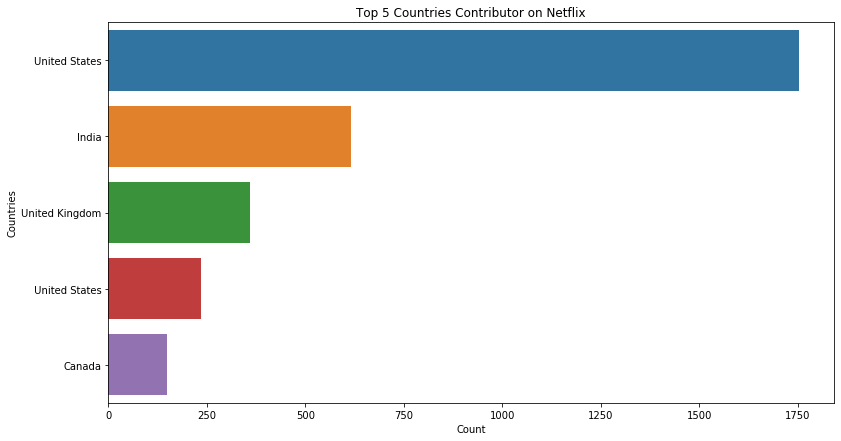

In [401]:
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:5])
plt.title('Top 5 Countries Contributor on Netflix')
plt.xlabel('Count')
plt.ylabel('Countries')
plt.show()

In [402]:
nf_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81088285,Movie,The Mayo Clinic,"Ken Burns, Christopher Loren Ewers, Erik Ewers",Peter Coyote,United States,"April 19, 2019",2018,TV-14,116 min,Documentaries,A look at how a world-renowned medical institu...
1,81077597,Movie,I Am,Onir,"Juhi Chawla, Rahul Bose, Nandita Das, Sanjay S...","India, Japan","March 4, 2019",2010,TV-MA,106 min,"Dramas, Independent Movies, International Movies",Four individuals in modern India grapple with ...


### Splitting the date time

In [403]:
min(nf_data['date_added'])

' April 1, 2014'

In [404]:
max(nf_data['date_added'])

'September 9, 2019'

In [405]:
nf_data['date_added'] = pd.to_datetime(nf_data['date_added'], infer_datetime_format=True)

In [406]:
nf_data['date_added']

0      2019-04-19
1      2019-03-04
2      2019-11-01
3      2019-12-31
4      2019-12-06
          ...    
4670   2018-08-02
4671   2018-01-29
4672   2019-05-25
4673   2019-06-19
4674   2017-06-01
Name: date_added, Length: 4662, dtype: datetime64[ns]

In [407]:
nf_data["day"] = nf_data['date_added'].map(lambda x: x.day)
nf_data["month"] = nf_data['date_added'].map(lambda x: x.month)
nf_data["year"] = nf_data['date_added'].map(lambda x: x.year)

nf_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year
0,81088285,Movie,The Mayo Clinic,"Ken Burns, Christopher Loren Ewers, Erik Ewers",Peter Coyote,United States,2019-04-19,2018,TV-14,116 min,Documentaries,A look at how a world-renowned medical institu...,19,4,2019
1,81077597,Movie,I Am,Onir,"Juhi Chawla, Rahul Bose, Nandita Das, Sanjay S...","India, Japan",2019-03-04,2010,TV-MA,106 min,"Dramas, Independent Movies, International Movies",Four individuals in modern India grapple with ...,4,3,2019


In [408]:
nf_data['duration']=nf_data['duration'].str.split(' ')

In [409]:
nf_data.groupby(nf_data['month']).agg({'duration': 'sum'})

,duration
month,
1,"[96, min, 87, min, 117, min, 46, min, 89, min,..."
2,"[150, min, 150, min, 2, Seasons, 71, min, 89, ..."
3,"[106, min, 62, min, 155, min, 123, min, 1, Sea..."
4,"[116, min, 54, min, 94, min, 104, min, 132, mi..."
5,"[4, Seasons, 83, min, 95, min, 71, min, 84, mi..."
6,"[2, Seasons, 5, Seasons, 3, Seasons, 1, Season..."
7,"[124, min, 69, min, 52, min, 1, Season, 2, Sea..."
8,"[1, Season, 7, Seasons, 94, min, 151, min, 1, ..."
9,"[88, min, 108, min, 108, min, 86, min, 97, min..."


### Combining IMDB_movies & IMDB_Ratings data & NETFLIX

In [159]:
# m_data.columns = ['imdb_title_id','title','cast','crew']
r_data = r_data.merge(m_data, on='imdb_title_id')

In [160]:
r_data.shape

(4652, 70)

In [164]:
nf1_data = nf_data.merge(r_data, on='title')

In [165]:
nf1_data.shape

(350, 81)

In [167]:
nf1_data.head()

,show_id,type,title,director_x,cast,country_x,date_added,release_year,rating,duration_x,...,actors,description_y,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,70298946,Movie,Camp X-Ray,Peter Sattler,"Kristen Stewart, Peyman Moaadi, John Carroll L...",United States,"January 14, 2017",2014,R,117 min,...,"Nawal Bengholam, Payman Maadi, Lane Garrison, ...",A soldier assigned to Guantanamo Bay befriends...,6.9,37328,"$1,000,000","$13,302","$79,624",54.0,90.0,100.0
1,70136074,Movie,The Last Exorcism,Daniel Stamm,"Patrick Fabian, Ashley Bell, Iris Bahr, Louis ...","France, United States","September 1, 2019",2010,PG-13,88 min,...,"Patrick Fabian, Ashley Bell, Iris Bahr, Louis ...",A troubled evangelical minister agrees to let ...,5.6,46494,"$1,800,000","$41,034,350","$67,738,090",63.0,319.0,315.0
2,60000409,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,"January 1, 2020",2000,PG,89 min,...,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",When a school in upstate New York is snowed in...,5.1,10861,"$13,000,000","$60,020,107","$62,464,731",34.0,98.0,35.0
3,70120142,Movie,Get Him to the Greek,Nicholas Stoller,"Jonah Hill, Russell Brand, Elisabeth Moss, Ros...",United States,"January 16, 2020",2010,R,109 min,...,"Russell Brand, Rose Byrne, Tyler McKinney, Zoe...",A record company intern is hired to accompany ...,6.4,163225,"$40,000,000","$60,974,475","$91,261,479",65.0,209.0,215.0
4,70063017,Movie,Guru,Mani Ratnam,"Abhishek Bachchan, Mithun Chakraborty, Aishwar...",India,"March 1, 2018",2007,TV-14,155 min,...,"Mithun Chakraborty, Abhishek Bachchan, Aishwar...","A villager, Gurukant Desai, arrives in Bombay ...",7.7,20420,INR 150000000,"$2,096,000","$24,108,727",70.0,97.0,19.0


__Calculating the weighted rating for the data set__

In [181]:
m0 = nf1_data["votes"].quantile(0.9) # 90% of the data is taken into consideraation
m0 # Shows the value where the 90% of the data lies around

332715.00000000035

In [180]:
C0 = nf1_data["avg_vote"].mean()  #average of the average vote across the list
C0

6.503142857142864

In [182]:
#qualified movies as per the m0 value
nf1_data = nf1_data[nf1_data['votes']>m0]

In [183]:
nf1_data.shape

(35, 81)

In [186]:
#Calculating the weighted rating
def weighted_rating1(x,m0=m0,C0=C0): # m- average of the total vote_average
    v = x['votes'] # Total number of votes
    R = x['avg_vote'] # average votes
    return (v/(v+m0)*R)+(m0/(m0+v)*C0) #C1 here is average vote after handling the missing values

In [187]:
nf1_data['score'] = nf1_data.apply(weighted_rating1, axis=1)

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
nf1_data = nf1_data.sort_values('score', ascending=False)

#Print the top 15 movies
nf1_data[['title', 'votes', 'avg_vote', 'score']].head(10)

,title,votes,avg_vote,score
102,Inception,1892929,8.8,8.456639
326,Schindler's List,1120236,8.9,8.351137
177,American History X,973804,8.5,7.991485
194,V for Vendetta,971038,8.2,7.766966
123,Taxi Driver,661269,8.3,7.698540
344,"Lock, Stock and Two Smoking Barrels",502631,8.2,7.524149
162,Monty Python and the Holy Grail,472150,8.2,7.498553
349,The King's Speech,604763,8.0,7.468759
182,Warrior,411155,8.2,7.441037
92,District 9,613333,7.9,7.408740


Text(0.5, 1.0, 'Most voted Movies')

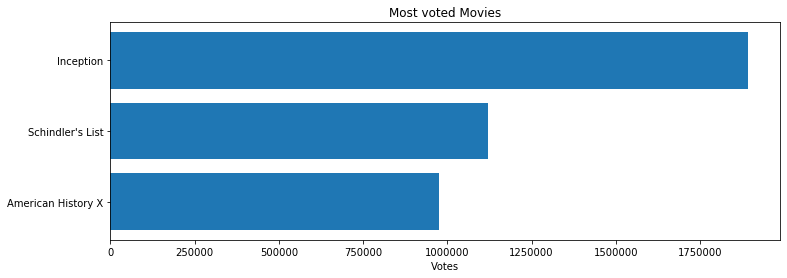

In [196]:
d0 = nf1_data.sort_values('votes',ascending=False)
plt.figure(figsize=(12,4))

plt.barh(d0['title'].head(3),d0['votes'].head(3),align='center')
plt.gca().invert_yaxis()
plt.xlabel('Votes')
plt.title("Most voted Movies")

### Therefore the Top rated movie that has ratings on imdb and is available on netflix are 

- > 1.  Inception


- > 2.  Schindler's List

- > 3.  American History X	

# Building a Content Based Recommender System:

### Using NETFLIX TITLES Data-set:

- First here the recommendation is based on the average user rating, meaning what most of the audience likes is what is recommended in general.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan

In [73]:
m_data.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0458349,Final Contract: Death on Delivery,Final Contract: Death on Delivery,2006,10/11/2008,Action,97,Germany,English,Axel Sand,...,"Drew Fuller, Alison King, Ken Bones, Tanja Wen...","David Glover is a young, American man who is w...",5.2,766,NaN,NaN,"$1,249,280",NaN,9.0,2.0
1,tt4711952,Heil,Heil,2015,7/16/2015,Comedy,102,Germany,German,Dietrich BrÃ¼ggemann,...,"Benno FÃ¼rmann, Jerry Hoffmann, Liv Lisa Fries...",An African-German Author loses his memory and ...,5.4,703,NaN,NaN,"$173,647",NaN,3.0,25.0


In [74]:
m_data.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [75]:
m_data.shape

(59164, 22)

In [76]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59164 entries, 0 to 59163
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          59164 non-null  object 
 1   title                  59164 non-null  object 
 2   original_title         59164 non-null  object 
 3   year                   59164 non-null  int64  
 4   date_published         59164 non-null  object 
 5   genre                  59164 non-null  object 
 6   duration               59164 non-null  int64  
 7   country                59135 non-null  object 
 8   language               58610 non-null  object 
 9   director               59106 non-null  object 
 10  writer                 58080 non-null  object 
 11  production_company     56007 non-null  object 
 12  actors                 59122 non-null  object 
 13  description            57396 non-null  object 
 14  avg_vote               59164 non-null  float64
 15  vo

In [77]:
m_data.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,59164.000000,59164.000000,59164.000000,5.916400e+04,9264.000000,54033.000000,51150.000000
mean,1992.899567,100.567575,5.931198,9.316266e+03,55.810557,43.163567,27.892747
std,24.028027,26.494961,1.240787,5.217047e+04,17.743438,157.113555,58.679236
min,1906.000000,40.000000,1.000000,1.000000e+02,1.000000,1.000000,1.000000
25%,1978.000000,88.000000,5.300000,2.060000e+02,44.000000,4.000000,3.000000
50%,2002.000000,96.000000,6.100000,4.960000e+02,56.000000,9.000000,8.000000
75%,2012.000000,108.000000,6.800000,1.863250e+03,69.000000,26.000000,24.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,883.000000


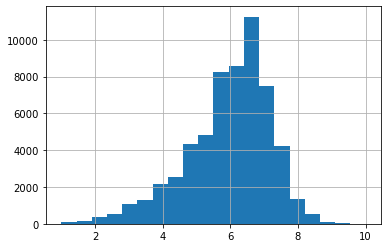

In [78]:
dfv= m_data['avg_vote'].hist(bins=20) # Bine=s: Intervals

In [79]:
C = m_data["avg_vote"].mean()
C

5.931198025826539

_Here we can note the average vote value which is __5.9 - 6.2 appx.___ Let us note this value is when the data set has missing values

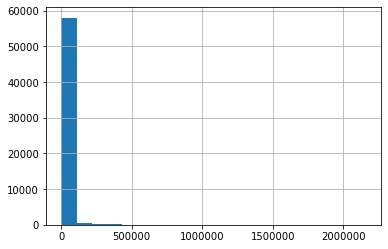

In [80]:
vote_hist= m_data['votes'].hist(bins=20)

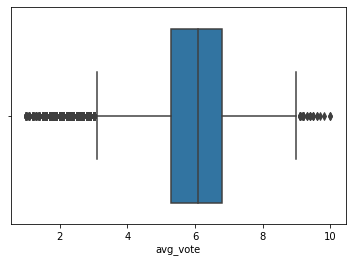

In [81]:
sns.boxplot(m_data["avg_vote"])

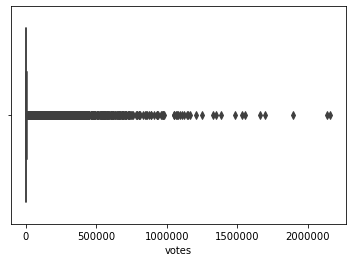

In [82]:
sns.boxplot(m_data["votes"])

__There are too many outliers in the data set wrt avg_vote & votes__

### Handling the missing values

In [83]:
m_data.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     29
language                   554
director                    58
writer                    1084
production_company        3157
actors                      42
description               1768
avg_vote                     0
votes                        0
budget                   42586
usa_gross_income         48187
worlwide_gross_income    37451
metascore                49900
reviews_from_users        5131
reviews_from_critics      8014
dtype: int64

___From the above data we can observe that the columns: 'country, language, director writer, production_company, actors, description etc. has the missing values ___

In [84]:
num_missing = (m_data[['duration','avg_vote','votes']]==0).sum()
num_missing

duration    0
avg_vote    0
votes       0
dtype: int64

In [85]:
m_data.shape

(59164, 22)

In [86]:
m_data[['duration','avg_vote','votes']]= m_data[['duration','avg_vote','votes']].replace(0,nan)
m_data.dropna(inplace=True)
m_data.shape

(4652, 22)

In [39]:
m_data.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
12,tt0309987,The Dreamers,The Dreamers,2003,10/10/2003,"Drama, Romance",115,"UK, France, Italy","English, French",Bernardo Bertolucci,...,"Michael Pitt, Eva Green, Louis Garrel, Anna Ch...",A young American studying in Paris in 1968 str...,7.2,103172,"$15,000,000","$2,532,228","$15,121,165",62.0,264.0,196.0
31,tt0096054,School Daze,School Daze,1988,2/12/1988,"Comedy, Drama, Musical",121,USA,English,Spike Lee,...,"Laurence Fishburne, Giancarlo Esposito, Tisha ...",A not so popular young man wants to pledge to ...,6.0,5695,"$6,500,000","$14,545,844","$14,545,844",49.0,41.0,23.0
49,tt0384488,Saint Ralph,Saint Ralph,2004,4/8/2005,"Comedy, Drama, Sport",98,Canada,English,Michael McGowan,...,"Adam Butcher, Michael Kanev, Gordon Pinsent, T...",Saint Ralph is the unlikely story of Ralph Wal...,7.4,5643,CAD 6000000,"$489,389","$1,881,975",51.0,56.0,46.0


In [46]:
# m_data = m_data['avg_vote']>

In [87]:
m_data.isnull().sum()

imdb_title_id            0
title                    0
original_title           0
year                     0
date_published           0
genre                    0
duration                 0
country                  0
language                 0
director                 0
writer                   0
production_company       0
actors                   0
description              0
avg_vote                 0
votes                    0
budget                   0
usa_gross_income         0
worlwide_gross_income    0
metascore                0
reviews_from_users       0
reviews_from_critics     0
dtype: int64

__Here we can observe that the final data now has no missing values in it__

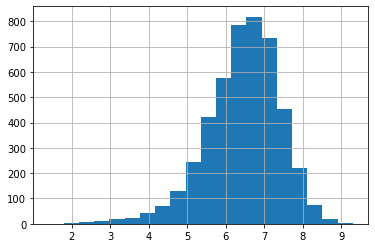

In [88]:
dfv= m_data['avg_vote'].hist(bins=20) # Bine=s: Intervals

_From the above histogramgraph we can observe that the average vote is maximum around __6.5 - 7___

In [89]:
C1 = m_data["avg_vote"].mean()
C1

6.454772141014606

- the mean rating for all the movies is approx 6.5 on a scale of 10

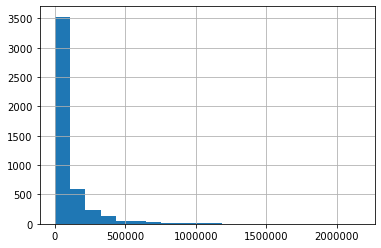

In [90]:
vote_hist= m_data['votes'].hist(bins=20)

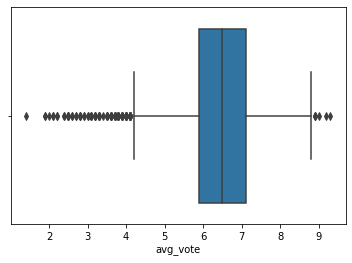

In [91]:
sns.boxplot(m_data["avg_vote"])

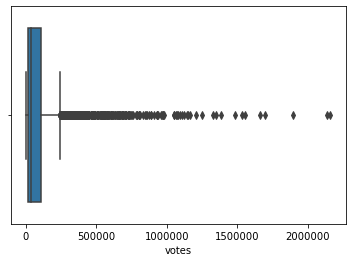

In [92]:
sns.boxplot(m_data["votes"])

__We can observe that while comaring the box plot, before & after handling the null values, there is a significant diffecence. Though still outlier exists but we can move forward for now__

In [93]:
avg_dur = m_data["duration"].mean()
avg_dur

107.90455717970765

In [94]:
m = m_data["votes"].quantile(0.9) # 90% of the data is taken into consideraation
m # Shows the value where the 90% of the data lies around

233737.1000000003

In [95]:
# m_data['worlwide_gross_income'].unique()

- get movies with more than 100min.

In [96]:
# Filtering the qualified movies for the use
q_mov = m_data.copy().loc[(m_data["duration"]>100)]

q_mov.shape

(2781, 22)

In [97]:
q_mov = q_mov[q_mov["votes"]>=m] #of these values in q_mov, how many satisfy this condition

In [98]:
q_mov.shape

(401, 22)

- Here we can observe that __401__ movies qualify for the condition we mentioned above, which are, average rating __>=m__ & duration __>100min__ considering the average minutes all user watch.

In [99]:
q_mov['votes']>m

93       True
295      True
297      True
348      True
353      True
         ... 
58677    True
58762    True
58779    True
59062    True
59071    True
Name: votes, Length: 401, dtype: bool

### Calculating the Weighted rating

![](https://image.ibb.co/jYWZp9/wr.png)


- v is the number of votes for the movie;

- m is the minimum votes required to be listed in the chart;

- R is the average rating of the movie; And

- C is the mean vote across the whole report

In [100]:
def weighted_rating(x,m=m,C1=C1): # m- average of the total vote_average
    v = x['votes'] # Total number of votes
    R = x['avg_vote'] # average votes
    return (v/(v+m)*R)+(m/(m+v)*C1) #C1 here is average vote after handling the missing values

In [101]:
q_mov['score']=q_mov.apply(weighted_rating, axis=1)

In [102]:
q_mov.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,score
93,tt0478311,Knocked Up,Knocked Up,2007,8/24/2007,"Comedy, Romance",129,USA,English,Judd Apatow,...,"For fun-loving party animal Ben Stone, the las...",6.9,336347,"$30,000,000","$148,768,917","$219,076,518",85.0,578.0,242.0,6.717455
295,tt1245492,This Is the End,This Is the End,2013,6/28/2013,Comedy,107,USA,"English, Spanish","Evan Goldberg, Seth Rogen",...,6 Los Angeles celebrities are stuck in James F...,6.6,366889,"$32,000,000","$101,470,202","$126,041,322",67.0,735.0,408.0,6.543484
297,tt0259711,Vanilla Sky,Vanilla Sky,2001,1/25/2002,"Fantasy, Mystery, Romance",136,"USA, Spain","English, Spanish",Cameron Crowe,...,A self-indulgent and vain publishing magnate f...,6.9,237485,"$68,000,000","$100,618,344","$203,388,341",45.0,1276.0,150.0,6.679157
348,tt0443706,Zodiac,Zodiac,2007,5/18/2007,"Crime, Drama, Mystery",157,USA,English,David Fincher,...,"In the late 1960s/early 1970s, a San Francisco...",7.7,407046,"$65,000,000","$33,080,084","$84,785,914",78.0,698.0,403.0,7.245781
353,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,3/17/2017,"Family, Fantasy, Musical",129,USA,English,Bill Condon,...,A selfish prince is cursed to become a monster...,7.2,248356,"$160,000,000","$504,014,165","$1,263,521,126",65.0,1049.0,514.0,6.838685


In [103]:
q_mov=q_mov.sort_values('score', ascending=False)

In [104]:
q_mov[["title", 'votes','avg_vote','score']].head(10)

,title,votes,avg_vote,score
48056,The Shawshank Redemption,2159628,9.3,9.022134
14735,The Godfather,1482143,9.2,8.826045
4405,The Dark Knight,2134569,9.0,8.748802
777,Pulp Fiction,1695085,8.9,8.603684
34474,The Lord of the Rings: The Return of the King,1533574,8.9,8.576604
4648,Inception,1892929,8.8,8.542241
5368,Forrest Gump,1662528,8.8,8.510923
47762,Schindler's List,1120236,8.9,8.477879
48210,The Matrix,1554261,8.7,8.406491
6321,The Lord of the Rings: The Two Towers,1387154,8.7,8.376232


Text(0.5, 1.0, 'Most voted Movies')

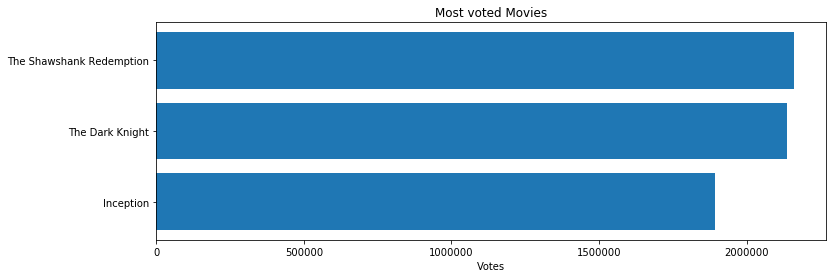

In [190]:
d = q_mov.sort_values('votes',ascending=False)
plt.figure(figsize=(12,4))

plt.barh(d['title'].head(3),d['votes'].head(3),align='center')
plt.gca().invert_yaxis()
plt.xlabel('Votes')
plt.title("Most voted Movies")

- From the above we can observe that the top rated movies based on the user rating are

- > 1. Shawshank Redemption
- > 2. The Dark Knight
- > 3. Inception.

which are popular across the population but not specific to particular user.

# Building a Recommendation system based on other features.

- We can see that it is quite generic recommendation so a particular user may or may not like the recommendation as the choices vary from user to user.


- So le us try to build a system where features like Cast, Director, Description, genre etc is taken into account & buld a function that returns top 3 similar movies.

![](https://miro.medium.com/max/2400/1*x8gTiprhLs7zflmEn1UjAQ.png)

## Description based approach

Here we will compare the short description of each movies & find a pairwise similarity score for all the movies.


## USING NETFLIX DATA SET

In [121]:
# m1_data = pd.read_csv("IMDB_movies.csv")
# m1_data.shape

In [124]:
nf_data.shape

(4662, 12)

In [125]:
nf_data['description'].head()

0    A look at how a world-renowned medical institu...
1    Four individuals in modern India grapple with ...
2    In this urban romantic comedy set in Chicago, ...
3    Framed for his older brother's murder, a boxer...
4    Academy Award-nominated filmmaker Noah Baumbac...
Name: description, dtype: object

- > Now let's convert the word vector of each desciption. Calculate the "Term Frequency-Inverse Document Frequency (TF-IDF) vector for each description.

- TF-IDF rulesout the drawback of Bag of Words which is that a word is given similar weightage across the document. Here in tfidf the weightage for words vary as per their importance. 

![](https://3.bp.blogspot.com/-u928a3xbrsw/UukmRVX_JzI/AAAAAAAAAKE/wIhuNmdQb7E/s1600/td-idf-graphic.png)

In [126]:
nf_data.shape

(4662, 12)

In [127]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF Vectorizer Object & remove all the English stop words.
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
nf_data['description'] = nf_data['description'].fillna('')

In [128]:
nf_data['description'].isna().sum()

0

In [129]:
#Creating a tf-idf matrix
tfidf_matrix = tfidf.fit_transform(nf_data['description'])

In [130]:
tfidf_matrix.shape #matrix is created

(4662, 13971)

- From here we can observe that __59000+__ words used to describe __57000+__ movies qualified

### Finding the similarity

- > Now we have to create a similarity score to match the pairs.

- > This can be done by Pearson similarity, Cosine Similarity or euclidian etc. Each has its own benefit & works better in some or the other conditions. So it's good to experiment with it.

- > Will be using Cosine Similarity as it is independent of the magnitude & easy, fast to calculate

Given by : The dot product between two vectors is equal to the projection of one of them on the other.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d)



- The dot product will directly give us the cosine similarity as we are using tf-idf vectorizer. Also, we can use __cosine_similarities()__ or another faster function from __sklearn__ which is __linear_kernel()__

#### Using linear_kernel()

In [131]:
#importing the linear_kernel
from sklearn.metrics.pairwise import linear_kernel

#finding the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### Building a function to take title as input & return similar movies

- > We need to reverse map the index of the movies to the titles, ie; identify the index of a movie from m_data & return a title.

In [132]:
indices = pd.Series(nf_data.index, index=nf_data['title']).drop_duplicates()

In [133]:
indices.head()

title
The Mayo Clinic    0
I Am               1
Love Jones         2
Ghayal             3
Marriage Story     4
dtype: int64

## Steps: 
- get the index of the movie when given the title


- get cosine score for that movie with all other movies>> convert to list of tuples >> with (pisition,score) format


- sort the list of tuples based on scores


- get top 3 from the list & ignoring the 1st as it refers to self.


- return the title corresponding to the index

In [145]:
def get_recommendations(title, cosine_sim=cosine_sim):
    #getting the index
    idx = indices[title]
    
    #retrieve the pairwise similarities for all movies with that mentioned movie
    sim_scores = list(enumerate(cosine_sim[idx])) #enumerate used to convert to list of tuples
    
    #Sorting the movies as per the similarity score
    sim_scores = sorted(sim_scores, key= lambda x:x[1], reverse=True) #since its in list of tuple
    
    #fetch the top 3 most similar movies
    sim_scores = sim_scores[1:4]
    
    #Fetch the movies indices
    movie_indices = [i[0] for i in sim_scores]
    
    # return the top 3 movies
    return nf_data['title'].iloc[movie_indices]

In [146]:
get_recommendations('The Mayo Clinic')

2926    The Bleeding Edge
1724          Jersey Boys
3486             End Game
Name: title, dtype: object

In [147]:
get_recommendations('Resident Evil: Afterlife')

'''Resident Evil: Afterlife: The Undead Apocalypse continues as super-soldier Alice 
finds her way to a supposed sanctuary in Los Angeles, which'''

    
"""Domino: TA Copenhagen police officer hunts for the man who attacked his partner, 
only to stumble into a high-stakes game of espionage."""


"""JReturn To The 36th Chamber:When thugs prey upon innocent factory workers, a 
small-time scammer trains for revenge by studying the moves of Shaolin temple monks."""


"""Karzzzz: When flashbacks reveal that he's the reincarnation of a man murdered by his wife, 
rock star Monty sets out to get revenge for the decades-old crime."""

# Above we can observe the description of each movies that has some sort of similarity to Residen Evil

440                         Domino
1457    Return To The 36th Chamber
1746                       Karzzzz
Name: title, dtype: object

#### Using cosine_similarity()

In [149]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim1 = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [153]:
def get_recommendations1(title, cosine_sim1=cosine_sim1):
    #getting the index
    idx = indices[title]
    
    #retrieve the pairwise similarities for all movies with that mentioned movie
    sim_scores = list(enumerate(cosine_sim1[idx])) #enumerate used to convert to list of tuples
    
    #Sorting the movies as per the similarity score
    sim_scores = sorted(sim_scores, key= lambda x:x[1], reverse=True) #since its in list of tuple
    
    #fetch the top 3 most similar movies
    sim_scores = sim_scores[1:4]
    
    #Fetch the movies indices
    movie_indices = [i[0] for i in sim_scores]
    
    # return the top 3 movies
    return nf_data['title'].iloc[movie_indices]

In [154]:
get_recommendations1('The Mayo Clinic')

2926    The Bleeding Edge
1724          Jersey Boys
3486             End Game
Name: title, dtype: object